# Veri Ön İşleme
# VERİ ÖN İŞLEMEYE GENEL BAKIŞ

    

### Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df = df.select_dtypes(include=['float64', 'int64'])

#### Verisetinin içerisindeki eksik değerlerin silinmesi ve dışarda bırakılması

In [4]:
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


#### Değişkenlerden bir tanesinin aykırı değer yakalamak için seçilmesi

In [7]:
df_table = df["table"]

In [8]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

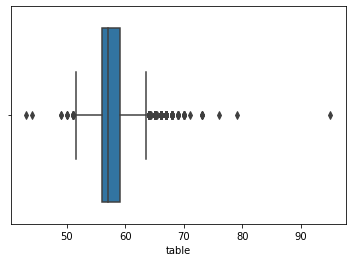

In [9]:
# Aykırı değerlerin yakalanması
sns.boxplot(x = df_table)

#### Grafiğin sağ ve sol tarafındakiler olacak şekilde table değişkeni için aykırı değerlere odaklanacağız.

In [10]:
# Eşik değer, yani alt ve üst sınır değerlerinin belirlenmesi
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
#  Küçükten büyüğe doğru sıralandığında yüzde 25. indeksine karşılık gelen değeri alacak
# ve yüzde 75
IQR = Q3-Q1


In [11]:
Q1

56.0

In [12]:
Q3

59.0

In [13]:
IQR

3.0

In [14]:
alt_sinir = Q1 - 1.5*IQR

In [15]:
ust_sinir = Q3 + 1.5*IQR

In [16]:
alt_sinir

51.5

In [17]:
ust_sinir

63.5

In [19]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [20]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [21]:
# Aykırı verilerin gerçek değerleri
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [22]:
# Aykırı değerlerin indexlerinin alınması
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [ ]:
# Sonraki bölümde bu index sahip olan değerlere düzeltme işlemi yapacağız

### Aykırı Değer Problemini Çözmek

### 1 - SİLME

In [23]:
import pandas as pd

In [24]:
type(df_table)

pandas.core.series.Series

In [25]:
df_table = pd.DataFrame(df_table)

In [26]:
df_table.shape

(53940, 1)

In [31]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis = 1)]
# ~ "tilda" işareti verilen koşulları sağlamayan verileri seçer
# Burada aykırı veriler temizlenerek yeni veri seti oluşturulmuştur.
# .any(axis = 1) sütün bazında bir işlem yapmak istediğimi belirtmek için. 

In [32]:
t_df.shape

(53335, 1)

In [33]:
# Yaklaşık olarak 605 yanlı değişken çıkartıldı.

### 2 - Ortalamayla Doldurma

In [36]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [37]:
df_table = df["table"]

In [38]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [39]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [40]:
df_table.mean()

57.45718390804598

In [41]:
df_table[aykiri_tf] = df_table.mean()
# Aykırı değerlerin ortalama ile değiştirilmesi

In [42]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### 3 - Baskılama Yöntemi : Aykırılar üst taraftaysa üst sınır değeri ile eşitlenir, alt taraftaysa alt sınır 

In [ ]:
# Böylece aslında aykırı değerlerin veri setini yukarı yönlü aşağı yönlü çekme çabası gözönünde bulundurulmuş olup onları ortalama ile değiştirmekten ( bazı senaryolarda ) çok daha mantıklı bir aksiyon alınmış olur.
# Yani bir aykırı gözlem zaten verisetinin uçlarında oluşan bir değerdir. Bunu komple silmek yerine ortalama ile atamak mantıklı olabilir. Ama verisetinin ortalamasıyla maximum değerin yani aykırı gözlemin gerçek değeri arasında çok ciddi bir fark varsa bu durumda örneğin 100 civarlarında olan bir değeri gidip 57 gibi bir değere atamış olduk. Bunun yerine 100 gibi bir değerin taşımış olduğu değeri biraz törpülemiş olsak da sınırlara doğru baskılayarak onu yine taşıdığı bilgi özüne uygun bir şekilde verisetinin içerisinde tutabiliriz.

In [43]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df_table = df["table"]
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [46]:
# Baskılama işlemi 
alt_sinir

51.5

In [47]:
df_table[aykiri_tf] = alt_sinir

In [48]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi ( LOF - Local Outlier Factor )

In [6]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64'])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# pip install sklearn
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [3]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
# n_neighbors -> komşu sayısı , contamination -> yoğunluk

In [7]:
clf.fit_predict(df)
# Algoritmanın çalıştırılması
# Bu işlemden sonra her bir gözlem birimi için skorlar oluşur.

array([-1, -1, -1, ...,  1,  1,  1])

In [8]:
df_scores = clf.negative_outlier_factor_

In [9]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [14]:
np.sort(df_scores)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [13]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [12]:
# Bu iki işlemi hangi değerin eşik değer olarak seçileceğini belirlemek için inceleme amaçlı sıraladık.

In [15]:
# 13. değerin eşik değer olarak belirlenmesi
np.sort(df_scores)[13]

-3.823787967755565

In [16]:
esik_değer = np.sort(df_scores)[13]

## 1 - Çok Değişkenli de Silme İşlemi

In [17]:
aykiri_tf = df_scores > esik_değer

In [18]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
yeni_df = df[df_scores > esik_değer]

In [20]:
# Aykırı olmayan değerler
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
# Aykırı değerler 
df[df_scores < esik_değer]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


## 2 - Çok Değişkenli de Baskılama

In [22]:
df[df_scores == esik_değer]
# Eşik değere karşılık gelen gözlem birimi
# Aykırı gözlemlerin yerine bu değerler atanacak. 

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [39]:
baski_degeri = df[df_scores == esik_değer]
baski_degeri

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [33]:
aykirilar = df[~aykiri_tf]

In [34]:
# Aykırı değerlerin yerine baski_değeri eklenirken bazı index problemleri ortaya çıkıyor.
# Bunun için bazı işlemlerin yapılması gerekir.

In [35]:
# aykirilar dataframe index siz bir yapıya dönüştürülmelidir.
aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [36]:
res = aykirilar.to_records(index = False)

In [40]:
# Aykırı değerlere baski_degeri yani eşik değer atanıyor
res[:] = baski_degeri.to_records(index = False)

In [41]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [42]:
# Burada res ayrı bir array, aykirilar ayrı bir array
df[~aykiri_tf]
# Bu array gerçek veri setinin içerisine aktarılmalıdır.

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [44]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)
# Veri setindeki aykırı değerlerin yerine res değerleri yerleştirildi. Fakat res te index olmadığı için res için kullanılacak index numaraları aykırı değerdeki index lerle aynı yapılarak değiştirildi.

In [45]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
